## Analysis of historical data

### Data
Source: EM-DAT, CRED / UCLouvain, Brussels, Belgium ; www.emdat.be (D. Guha-Sapir)

Version: 020-09-01

File creation: Sat, 12 Sep 2020 22:21:30 CEST

Table type: Custom request

Number of records: 24520

### Important Notes 

For a disaster to be entered into the EM-DAT database at least one of the following criteria must be fulfilled:

* Ten (10) or more people reported killed
* Hundred (100) or more people reported affected
* Declaration of a state of emergency
* Call for international assistance

source: https://www.emdat.be/explanatory-notes

⚠️ if we will use different databases, we must have common criteria 


### Packages:

In [35]:
import pandas as pd 
import copy as copy 
# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import utilities

### Loading em-dat data 

In [36]:
flood_table = utilities.dataframe_flood()
flood_table

,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,Country,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
Source:,,,,,,,,,,,,,,,,,,,,,
1906-0023-BEL,1906,0023,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,Belgium,...,14,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5223
1906-0024-BEL,1906,0024,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,Belgium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5223
1911-0002-CHN,1911,0002,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,China,...,NaN,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.65276
1915-0011-CHN,1915,0011,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affect,China,...,NaN,NaN,NaN,3000000,NaN,3000000,NaN,NaN,NaN,3.96585
1917-0013-CHN,1917,0013,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affect,China,...,NaN,NaN,NaN,635000,NaN,635000,NaN,NaN,NaN,5.02254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-0168-YEM,2020,0168,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Kill,Yemen,...,22,10,30,150000,NaN,150030,NaN,NaN,NaN,NaN
2020-0216-YEM,2020,0216,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,Yemen,...,4,16,85,130,NaN,215,NaN,NaN,NaN,NaN
2020-0319-YEM,2020,0319,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,Yemen,...,25,172,124,NaN,NaN,124,NaN,NaN,NaN,NaN


### Period

In [37]:
print('from',flood_table['Year'].min(),'to',flood_table['Year'].max())

from 1900 to 2020


### Types of floods 

The types of floods that are considered by EM-DAT are:
* Coastal flood	
* Riverine flood
* Flash flood
* Ice jam flood

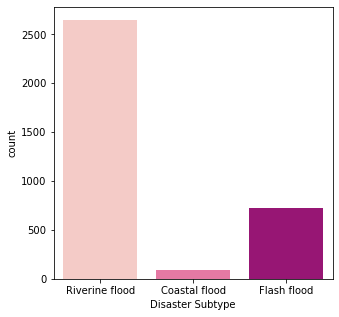

""
Disaster Subtype
Coastal flood
Flash flood
Riverine flood


In [38]:
# the types of floods that have occurred 
plt.figure(figsize=(5,5))
sns.countplot(x="Disaster Subtype", data=flood_table,palette='RdPu')
plt.show()
flood_table[['Disaster Subtype']].groupby(by=['Disaster Subtype']).count()

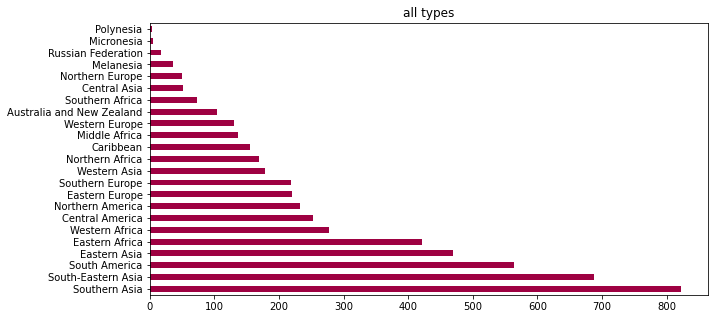

In [39]:
flood_table['Region'].value_counts().plot(kind='barh', figsize=(10,5),cmap='Spectral',title='all types')

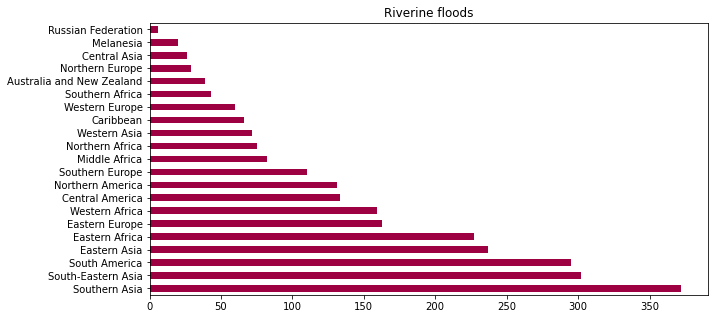

In [40]:
flood_table.loc[flood_table['Disaster Subtype']=='Riverine flood','Region'].value_counts().plot(kind='barh', figsize=(10,5),cmap='Spectral',title='Riverine floods')

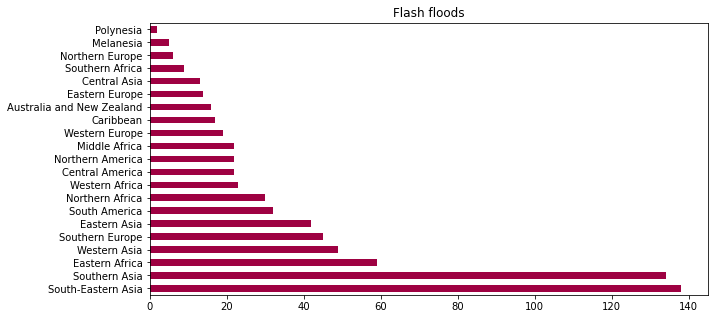

In [41]:
flood_table.loc[flood_table['Disaster Subtype']=='Flash flood','Region'].value_counts().plot(kind='barh', figsize=(10,5),cmap='Spectral',title='Flash floods')

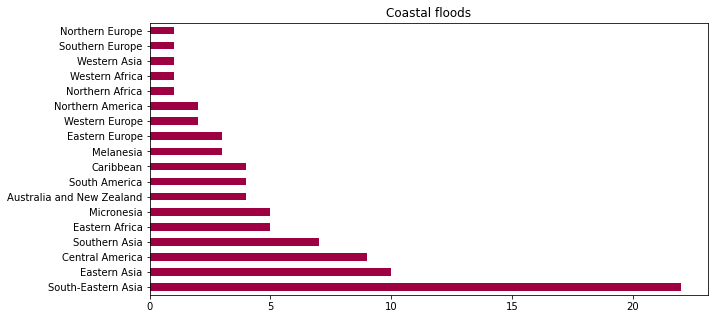

In [42]:
flood_table.loc[flood_table['Disaster Subtype']=='Coastal flood','Region'].value_counts().plot(kind='barh', figsize=(10,5),cmap='Spectral',title='Coastal floods')

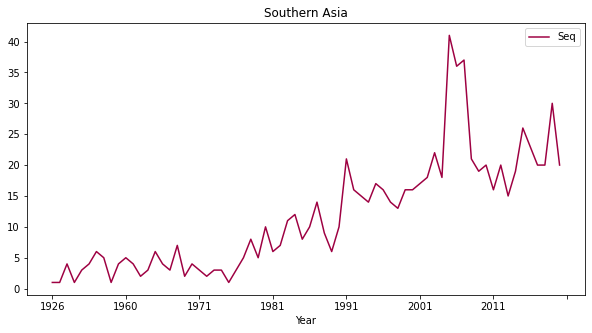

In [43]:
southernAsiaplt = flood_table.loc[flood_table['Region']=='Southern Asia',['Year','Seq']].groupby(by=['Year']).count()
southernAsiaplt.plot(figsize=(10,5),cmap='Spectral',title='Southern Asia')

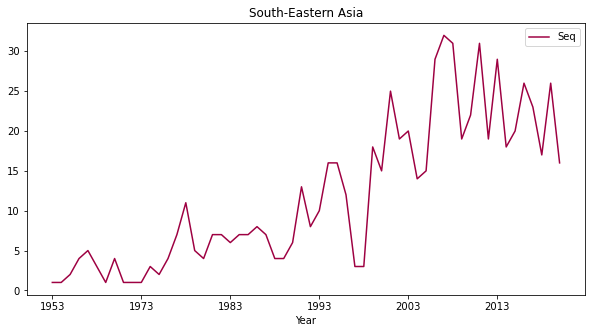

In [44]:
flood_table.loc[flood_table['Region']=='South-Eastern Asia',['Year','Seq']].groupby(by=['Year']).count().plot(figsize=(10,5),cmap='Spectral',title='South-Eastern Asia')

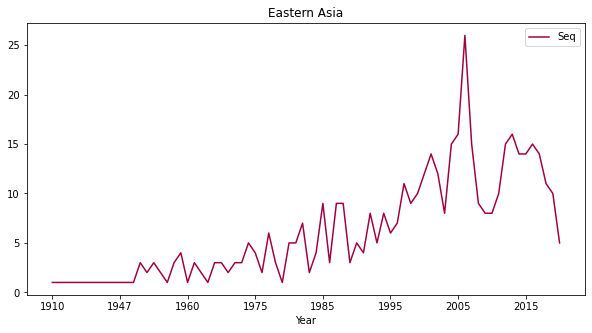

In [46]:
flood_table.loc[flood_table['Region']=='Eastern Asia',['Year','Seq']].groupby(by=['Year']).count().plot(figsize=(10,5),cmap='Spectral',title='Eastern Asia')

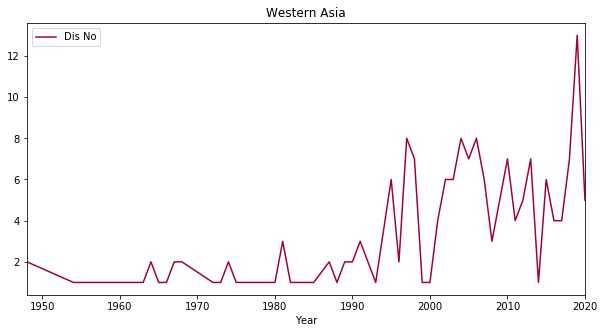

In [135]:
flood_table.loc[flood_table['Region']=='Western Asia',['Year','Seq']].groupby(by=['Year']).count().plot(figsize=(10,5),cmap='Spectral',title='Western Asia')

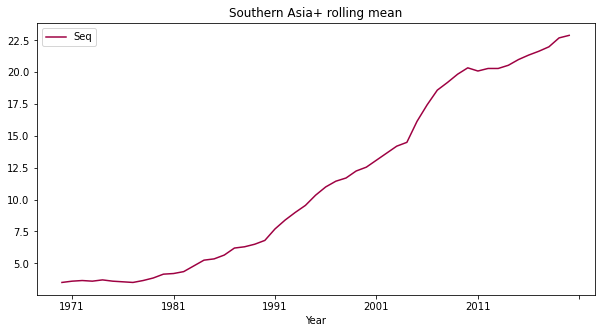

In [47]:
flood_table.loc[flood_table['Region']=='Southern Asia',['Year','Seq']].groupby(by=['Year']).count().rolling(20).mean().plot(figsize=(10,5),cmap='Spectral',title='Southern Asia+ rolling mean')

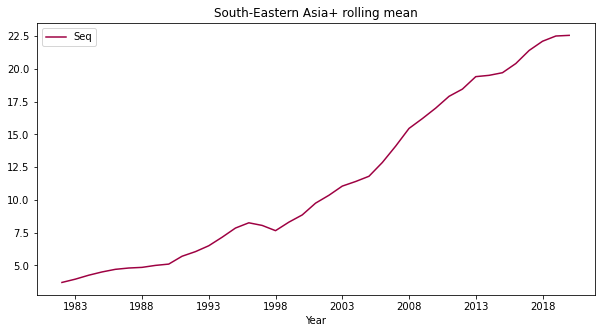

In [49]:
flood_table.loc[flood_table['Region']=='South-Eastern Asia',['Year','Seq']].groupby(by=['Year']).count().rolling(20).mean().plot(figsize=(10,5),cmap='Spectral',title='South-Eastern Asia+ rolling mean')

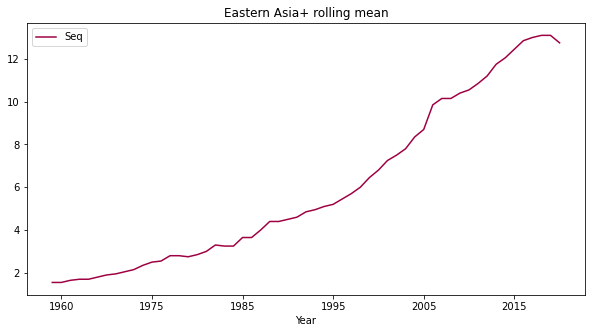

In [51]:
flood_table.loc[flood_table['Region']=='Eastern Asia',['Year','Seq']].groupby(by=['Year']).count().rolling(20).mean().plot(figsize=(10,5),cmap='Spectral',title='Eastern Asia+ rolling mean')

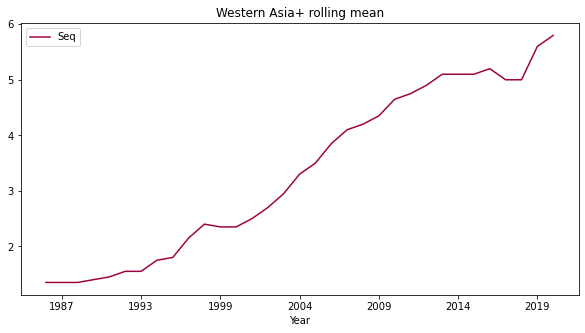

In [52]:
flood_table.loc[flood_table['Region']=='Western Asia',['Year','Seq']].groupby(by=['Year']).count().rolling(20).mean().plot(figsize=(10,5),cmap='Spectral',title='Western Asia+ rolling mean')